In [68]:
import pandas as pd
import numpy as np

In [69]:
df = pd.read_csv("D:\\ML\\21. ML - multiple linear regression data.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## First we need to check is there any na() values 

In [70]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## we need to change objects into numerical values 

In [71]:
from sklearn.preprocessing import LabelEncoder

In [72]:
label_encoder = LabelEncoder()

In [73]:
df['State'] = label_encoder.fit_transform(df['State'])
df[["State"]]

,State
0,2
1,0
2,1
3,2
4,1
5,2
6,0
7,1
8,2
9,0


In [74]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [75]:
import seaborn as sns

C:\Thirumoolar\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Thirumoolar\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Thirumoolar\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Thirumoolar\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode

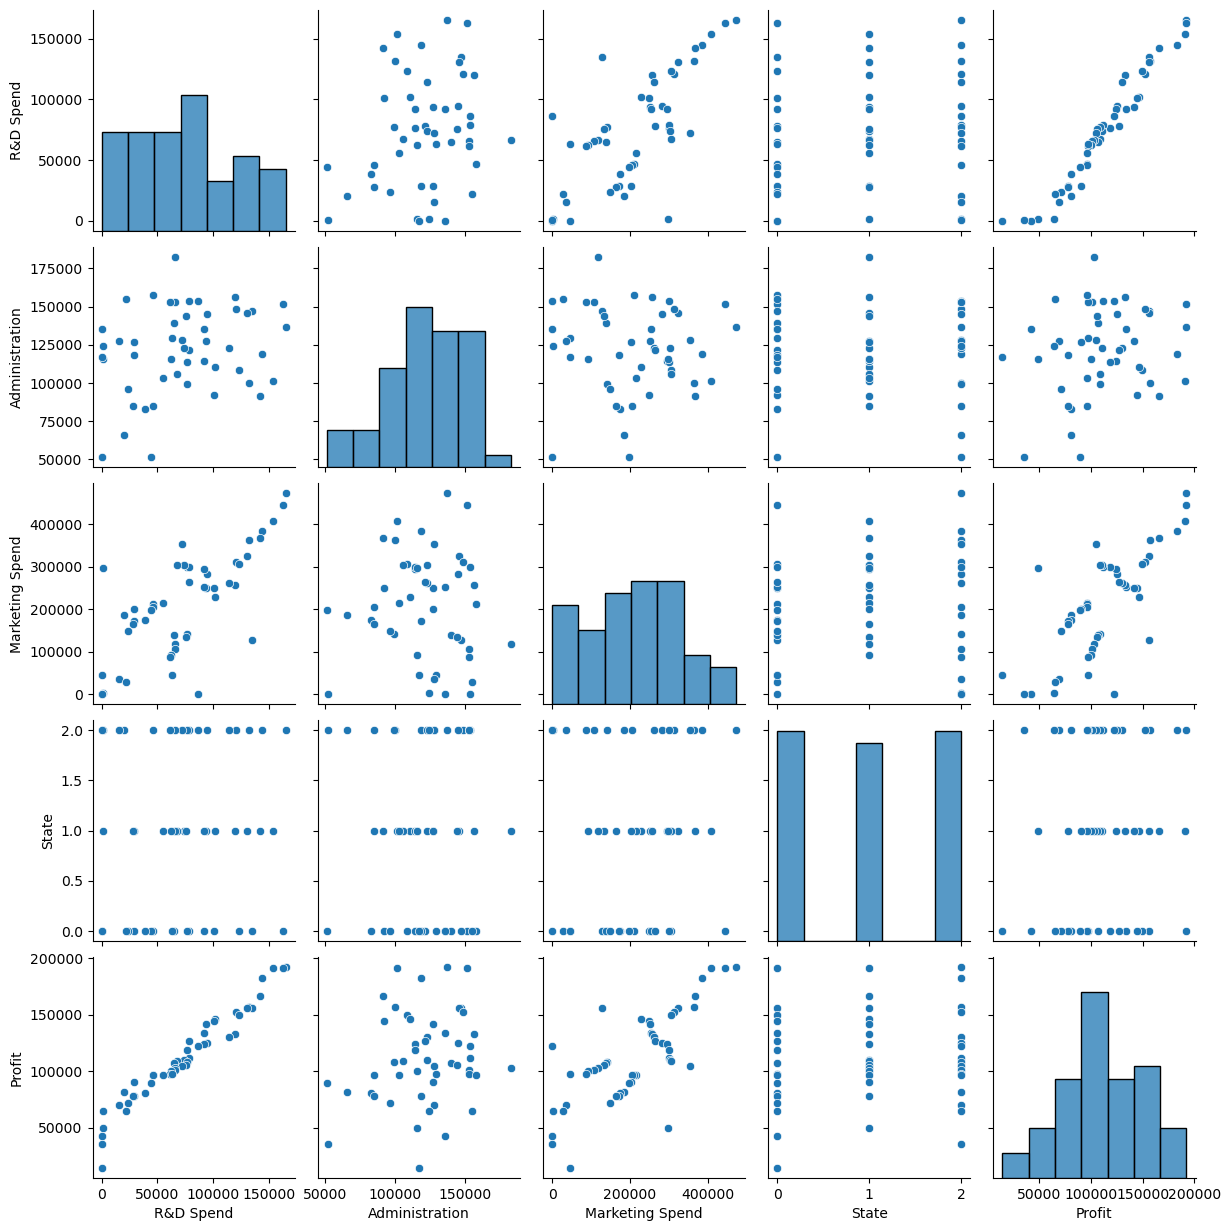

In [76]:
sns.pairplot(df)

In [77]:
x = df[['R&D Spend' , 'Administration' , 'Marketing Spend' , 'State']]
x

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [78]:
y = df[['Profit']]
y

,Profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size= 0.2 , random_state=0)

In [81]:
x_train

,R&D Spend,Administration,Marketing Spend,State
33,55493.95,103057.49,214634.81,1
35,46014.02,85047.44,205517.64,2
26,75328.87,144135.98,134050.07,1
34,46426.07,157693.92,210797.67,0
18,91749.16,114175.79,294919.57,1
7,130298.13,145530.06,323876.68,1
14,119943.24,156547.42,256512.92,1
45,1000.23,124153.04,1903.93,2
48,542.05,51743.15,0.00,2
29,65605.48,153032.06,107138.38,2


In [82]:
x_test

,R&D Spend,Administration,Marketing Spend,State
28,66051.52,182645.56,118148.20,1
11,100671.96,91790.61,249744.55,0
10,101913.08,110594.11,229160.95,1
41,27892.92,84710.77,164470.71,1
2,153441.51,101145.55,407934.54,1
27,72107.60,127864.55,353183.81,2
38,20229.59,65947.93,185265.10,2
31,61136.38,152701.92,88218.23,2
22,73994.56,122782.75,303319.26,1
4,142107.34,91391.77,366168.42,1


In [83]:
y_train

,Profit
33,96778.92
35,96479.51
26,105733.54
34,96712.80
18,124266.90
7,155752.60
14,132602.65
45,64926.08
48,35673.41
29,101004.64


In [84]:
y_test

,Profit
28,103282.38
11,144259.40
10,146121.95
41,77798.83
2,191050.39
27,105008.31
38,81229.06
31,97483.56
22,110352.25
4,166187.94


In [85]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [86]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
reg = LinearRegression()

In [89]:
reg.fit(x_train , y_train)

LinearRegression()

## This is Graph for x_train

In [90]:
Y= reg.predict(x_train)
Y

array([[ 96716.68171702],
       [ 88801.63552955],
       [110560.49175207],
       [ 90871.59085947],
       [128034.4516072 ],
       [159954.39493753],
       [149887.15143773],
       [ 47888.50682845],
       [ 45276.00552722],
       [102648.50739725],
       [145148.51514629],
       [ 97836.30209663],
       [ 97457.170545  ],
       [116199.58650452],
       [ 69109.72429124],
       [115797.02574096],
       [ 60434.38754868],
       [152356.33661195],
       [127076.69340847],
       [101954.43105736],
       [161476.2031504 ],
       [131113.86652202],
       [ 74625.92379194],
       [ 47773.66299724],
       [189110.30695544],
       [128501.09305694],
       [ 85341.36150409],
       [111080.69970168],
       [156193.82287809],
       [109302.37352296],
       [ 76118.21045943],
       [119332.94171128],
       [115098.31605102],
       [152452.28000784],
       [ 81247.1578372 ],
       [ 57875.3113409 ],
       [172468.34613371],
       [192416.48617631],
       [ 467

In [91]:
y_train

,Profit
33,96778.92
35,96479.51
26,105733.54
34,96712.80
18,124266.90
7,155752.60
14,132602.65
45,64926.08
48,35673.41
29,101004.64


In [92]:
import matplotlib.pyplot as plt

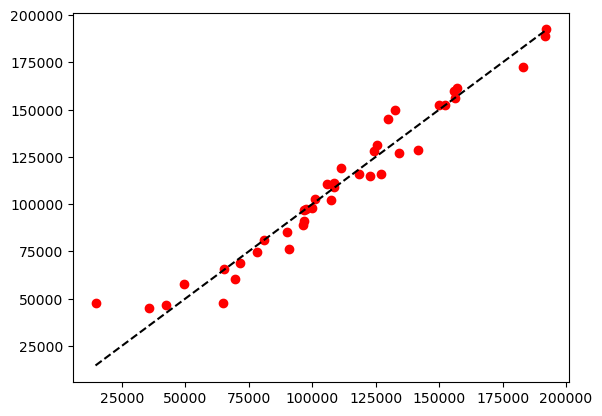

In [93]:
plt.scatter(y_train , Y , color ='r')
plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()] , 'k--')

# Wrong

# plt.scatter(x_train , y_train)
# plt.plot(y_train , Y , color ='r')  # This is for simple linear regression

In [94]:
from sklearn.metrics import r2_score

In [95]:
r2_score(y_train,Y)

0.9500009880362248

## This is graph for x_test 

In [96]:
Y1 = reg.predict(x_test)
Y1

array([[103959.40508021],
       [132398.73236694],
       [133529.03790148],
       [ 72958.28368314],
       [179534.78737166],
       [115533.62584099],
       [ 67476.95847883],
       [ 98504.36199396],
       [114789.16083781],
       [168972.21909945]])

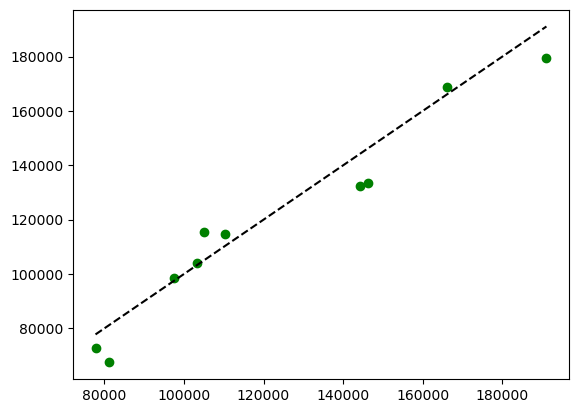

In [97]:
plt.scatter(y_test , Y1 , color ='g')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()] , 'k--')

In [98]:
r2_score(y_test,Y1)

0.9386861070938134

In [99]:
# The r2_score is between the 0 to 1
# If the value is closer to 1 then the code is good
# If the value is closer to 0 then the code is bad

In [100]:
reg.predict([[142107.34	,91391.77	,366168.42	,1]])

#  In the predict we can give x_train or x_test values , it will predict y_train or y_test and it same as z or z1

array([[6.75195622e+09]])